# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.describe()
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No percibí errores en los datos así que sólo enriqueceré estos agregando tres columnas, una que se llama
total_cost_per_gb que  indica el costo total por GB adicional, otra que es total_cost_per_message e indica el costo total por mensaje adicional y por último total_cost_per_minute que indica el costo total por minuto adicional.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans['total_cost_per_gb'] = plans['usd_per_gb'] + plans['usd_monthly_pay']
plans['total_cost_per_message'] = plans['usd_per_message'] + plans['usd_monthly_pay']
plans['total_cost_per_minute'] = plans['usd_per_minute'] + plans['usd_monthly_pay']
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   total_cost_per_gb  total_cost_per_message  total_cost_per_minute  
0                 30                   20.03                  20.03  
1                 77                   70.01                  70.01  


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

users.describe()
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este conjunto de datos puedo observar que la columna churn_date tiene muchos valores nulos lo que podría
indicar que esos clientes siguen activos, convertiré reg_date a un tipo de datos fecha y hora, remplazaré
los valores nulos en churn_date con "Activo" y añadiré dos columnas: is_churned, que indica si el usuario ha abandonado el servicio
y subscription_duration, que calcula la duración de la suscripción del usuario en días para los usuarios que han abandonado el servicio.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = users['churn_date'].fillna('Activo')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
users['is_churned'] = users['churn_date'] != 'Activo'
users.loc[users['is_churned'], 'subscription_duration'] = (pd.to_datetime(users.loc[users['is_churned'], 'churn_date']) - users['reg_date']).dt.days
print(users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

    reg_date      plan  churn_date  is_churned  subscription_duration  
0 2018-12-24  ultimate      Activo  

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas

calls.describe()
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La columna call_date es de tipo objeto, para un análisis más eficiente voy a convertirlo a tipo de datos de fecha y hora
para complementar voy a agregar 3 columnas :  day_of_week indica el día de la semana de la llamada,
weekend que  indica si la llamada fue realizada durante el fin de semana y duration_rounded que
indica la duración de la llamada redondeada al minuto más cercano.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
print(calls.head())

         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [16]:
calls['day_of_week'] = calls['call_date'].dt.dayofweek
calls['weekend'] = calls['day_of_week'].isin([5, 6])
calls['duration_rounded'] = calls['duration'].round()
print(calls.head(10))

         id  user_id  call_date  duration  day_of_week  weekend  \
0   1000_93     1000 2018-12-27      8.52            3    False   
1  1000_145     1000 2018-12-27     13.66            3    False   
2  1000_247     1000 2018-12-27     14.48            3    False   
3  1000_309     1000 2018-12-28      5.76            4    False   
4  1000_380     1000 2018-12-30      4.22            6     True   
5  1000_388     1000 2018-12-31      2.20            0    False   
6  1000_510     1000 2018-12-27      5.75            3    False   
7  1000_521     1000 2018-12-28     14.18            4    False   
8  1000_530     1000 2018-12-28      5.77            4    False   
9  1000_544     1000 2018-12-26      4.40            2    False   

   duration_rounded  
0               9.0  
1              14.0  
2              14.0  
3               6.0  
4               4.0  
5               2.0  
6               6.0  
7              14.0  
8               6.0  
9               4.0  


## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes

messages.describe()
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Lo único que veo inconveniente es que la columna es de tipo objeto y para un correcto análisis la voy a pasar
a formato de fecha y hora.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
messages['day_of_week'] = messages['message_date'].dt.dayofweek
messages['weekend'] = messages['day_of_week'].isin([5, 6])
print(messages.head())

         id  user_id message_date  day_of_week  weekend
0  1000_125     1000   2018-12-27            3    False
1  1000_160     1000   2018-12-31            0    False
2  1000_223     1000   2018-12-31            0    False
3  1000_251     1000   2018-12-27            3    False
4  1000_255     1000   2018-12-26            2    False


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet

internet.describe()
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

De igual forma en este dataframe pasaré la columna session_date de objeto a datetime para poder trabajar mejor
con los datos y anexaré 3 columnas: day_of_week que indica el día de la semana de la sesión de internet, 
weekend que indica si la sesión de internet fue durante el fin de semana y 
gb_used que indica los gigabytes utilizados redondeados al GB más cercano.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [26]:
internet['day_of_week'] = internet['session_date'].dt.dayofweek
internet['weekend'] = internet['day_of_week'].isin([5, 6])
internet['gb_used'] = (internet['mb_used'] / 1024).round()
print(internet.head())

         id  user_id session_date  mb_used  day_of_week  weekend  gb_used
0   1000_13     1000   2018-12-29    89.86            5     True      0.0
1  1000_204     1000   2018-12-31     0.00            0    False      0.0
2  1000_379     1000   2018-12-28   660.40            4    False      1.0
3  1000_413     1000   2018-12-26   270.99            2    False      0.0
4  1000_442     1000   2018-12-27   880.22            3    False      1.0


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [27]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   total_cost_per_gb  total_cost_per_message  total_cost_per_minute  
0                 30                   20.03                  20.03  
1                 77                   70.01                  70.01  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [28]:
calls['month'] = calls['call_date'].dt.to_period('M')
messages['month'] = messages['message_date'].dt.to_period('M')
internet['month'] = internet['session_date'].dt.to_period('M')




In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_grouped = calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_grouped = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='total_minutes')

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

messages_grouped = messages.groupby(['user_id', 'month']).size().reset_index(name='num_messages')

In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_grouped = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb')

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df = pd.merge(calls_grouped, minutes_grouped, on=['user_id', 'month'], how='outer')
df = pd.merge(df, messages_grouped, on=['user_id', 'month'], how='outer')
df = pd.merge(df, internet_grouped, on=['user_id', 'month'], how='outer')

In [34]:
# Añade la información de la tarifa

df = pd.merge(df, users[['user_id', 'plan']], on='user_id', how='left')
df = pd.merge(df, plans, left_on='plan', right_on='plan_name', how='left')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [35]:
# Calcula el ingreso mensual para cada usuario

def calculate_revenue(row):
    # Calcular el costo adicional por llamadas, mensajes y datos
    extra_calls = max(0, row['total_minutes'] - row['minutes_included'])
    extra_messages = max(0, row['num_messages'] - row['messages_included'])
    extra_data = max(0, row['total_mb'] - row['mb_per_month_included'])
    
    total_cost = (extra_calls * row['usd_per_minute'] +
                  extra_messages * row['usd_per_message'] +
                  np.ceil(extra_data / 1024) * row['usd_per_gb'] +
                  row['usd_monthly_pay'])
    
    return total_cost

df['monthly_revenue'] = df.apply(calculate_revenue, axis=1)

print(df.head(10))
    
    




   user_id    month  num_calls  total_minutes  num_messages  total_mb  \
0     1000  2018-12       16.0         116.83          11.0   1901.47   
1     1001  2018-08       27.0         171.14          30.0   6919.15   
2     1001  2018-09       49.0         297.69          44.0  13314.82   
3     1001  2018-10       65.0         374.11          53.0  22330.49   
4     1001  2018-11       64.0         404.59          36.0  18504.30   
5     1001  2018-12       56.0         392.93          44.0  19369.18   
6     1002  2018-10       11.0          54.13          15.0   6552.01   
7     1002  2018-11       55.0         359.76          32.0  19345.08   
8     1002  2018-12       47.0         363.24          41.0  14396.24   
9     1003  2018-12      149.0        1041.00          50.0  27044.14   

       plan  messages_included  mb_per_month_included  minutes_included  \
0  ultimate               1000                  30720              3000   
1      surf                 50                

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

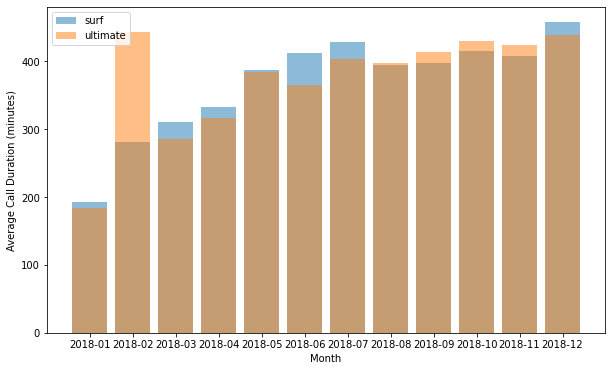

In [36]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

average_call_duration = df.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

plt.figure(figsize=(10, 6))
for plan in average_call_duration['plan'].unique():
    plt.bar(average_call_duration[average_call_duration['plan'] == plan]['month'].astype(str), 
            average_call_duration[average_call_duration['plan'] == plan]['total_minutes'], 
            alpha=0.5, 
            label=plan)
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend()
plt.show()


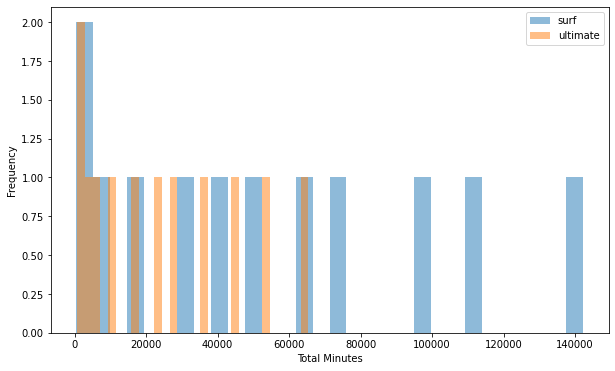

In [37]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

monthly_minutes = df.groupby(['plan', 'month'])['total_minutes'].sum().reset_index()

plt.figure(figsize=(10, 6))
for plan in monthly_minutes['plan'].unique():
    plt.hist(monthly_minutes[monthly_minutes['plan'] == plan]['total_minutes'], 
             bins=30, 
             alpha=0.5, 
             label=plan)
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [38]:
# Calcula la media y la varianza de la duración mensual de llamadas.

mean_minutes = df.groupby('plan')['total_minutes'].mean()
var_minutes = df.groupby('plan')['total_minutes'].var()

print(mean_minutes)
print(var_minutes)

plan
surf        412.097890
ultimate    410.180954
Name: total_minutes, dtype: float64
plan
surf        47001.254231
ultimate    50510.631705
Name: total_minutes, dtype: float64


<Figure size 720x432 with 0 Axes>

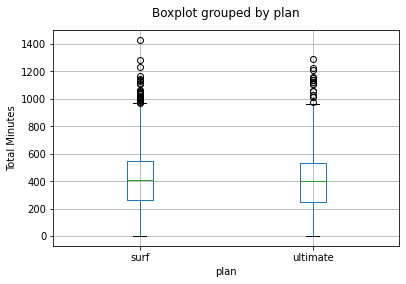

In [39]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
df.boxplot(column='total_minutes', by='plan')
plt.title('')
plt.ylabel('Total Minutes')
plt.show()



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Podemos observar mediante las muestras que sí existen ligeras variaciones en las llamadas respecto a cada
plan pero son mínimas, sólo en el mes de febrero de 2018 sí hay una diferencia importante entre el plan ultimate y el surf 
ya que en el ultimate de ese mes la duración promedio de llamada fue mucho mayor y en cuanto al número de 
minutos mensuales que reequiere el usuario de cada plan también hay una diferencia importante respecto a
que los usuarios del plan surf requieren de más minutos.

### Mensajes

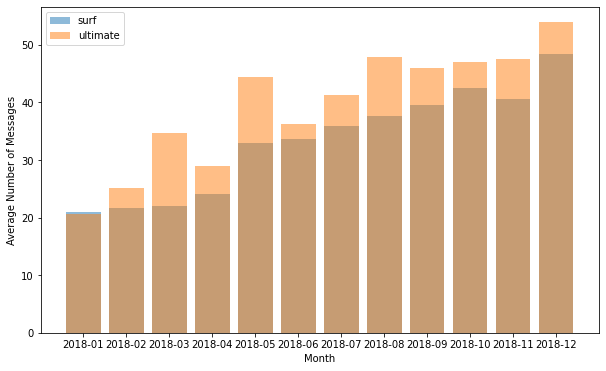

In [41]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

messages_grouped = pd.merge(messages_grouped, users[['user_id', 'plan']], on='user_id', how='left')
average_messages = messages_grouped.groupby(['plan', 'month'])['num_messages'].mean().reset_index()

plt.figure(figsize=(10, 6))
for plan in average_messages['plan'].unique():
    plt.bar(average_messages[average_messages['plan'] == plan]['month'].astype(str), 
            average_messages[average_messages['plan'] == plan]['num_messages'], 
            alpha=0.5, 
            label=plan)
plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.legend()
plt.show()

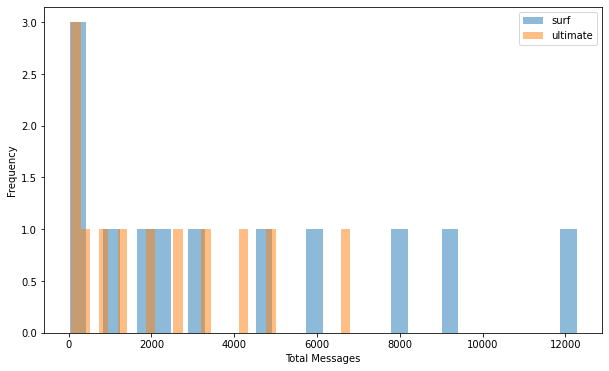

In [42]:
monthly_messages = messages_grouped.groupby(['plan', 'month'])['num_messages'].sum().reset_index()

plt.figure(figsize=(10, 6))
for plan in monthly_messages['plan'].unique():
    plt.hist(monthly_messages[monthly_messages['plan'] == plan]['num_messages'], 
             bins=30, 
             alpha=0.5, 
             label=plan)
plt.xlabel('Total Messages')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [43]:
mean_messages = messages_grouped.groupby('plan')['num_messages'].mean()
var_messages = messages_grouped.groupby('plan')['num_messages'].var()

print(mean_messages)
print(var_messages)


plan
surf        40.109656
ultimate    46.296233
Name: num_messages, dtype: float64
plan
surf        1091.344231
ultimate    1085.183108
Name: num_messages, dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Sí varía conforme al plan, podemos observar que los usuarios del plan ultimate en todos los meses
superan al plan surf en cantidad de mensajes.

### Internet

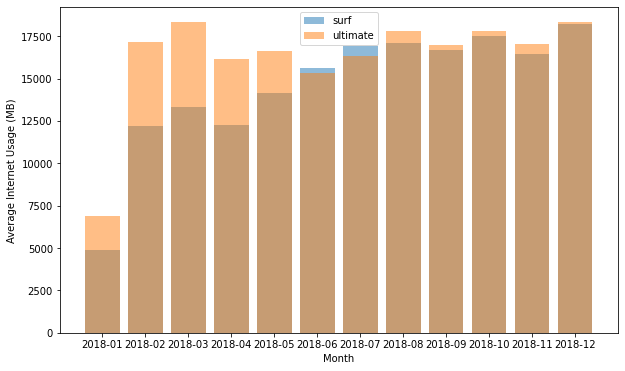

In [45]:
internet_grouped = pd.merge(internet_grouped, users[['user_id', 'plan']], on='user_id', how='left')
average_internet = internet_grouped.groupby(['plan', 'month'])['total_mb'].mean().reset_index()

plt.figure(figsize=(10, 6))
for plan in average_internet['plan'].unique():
    plt.bar(average_internet[average_internet['plan'] == plan]['month'].astype(str), 
            average_internet[average_internet['plan'] == plan]['total_mb'], 
            alpha=0.5, 
            label=plan)
plt.xlabel('Month')
plt.ylabel('Average Internet Usage (MB)')
plt.legend()
plt.show()

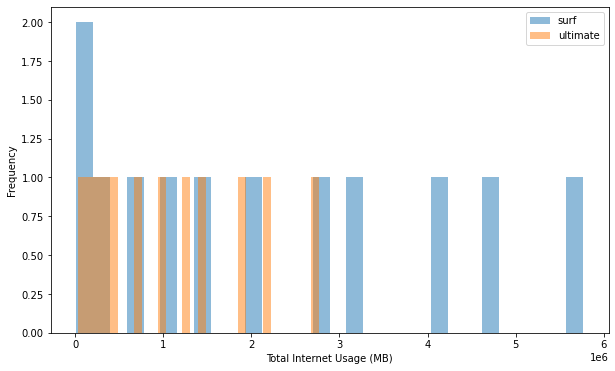

In [46]:
monthly_internet = internet_grouped.groupby(['plan', 'month'])['total_mb'].sum().reset_index()

plt.figure(figsize=(10, 6))
for plan in monthly_internet['plan'].unique():
    plt.hist(monthly_internet[monthly_internet['plan'] == plan]['total_mb'], 
             bins=30, 
             alpha=0.5, 
             label=plan)
plt.xlabel('Total Internet Usage (MB)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [47]:
mean_internet = internet_grouped.groupby('plan')['total_mb'].mean()
var_internet = internet_grouped.groupby('plan')['total_mb'].var()

print(mean_internet)
print(var_internet)

plan
surf        16717.702137
ultimate    17238.642253
Name: total_mb, dtype: float64
plan
surf        6.216823e+07
ultimate    6.132485e+07
Name: total_mb, dtype: float64


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

En esta sección veo un consumo más igualado entre planes respecto al consumo de internet; Se puede observar que 
en los primeros meses de año 2018 el consumo de datos por parte de los usuarios del plan ultimate sí fue mayor
pero despúes los usuarios del plan surf fueron equilibrando el consumo conforme a los usuarios del plan
ultimate para el resto del año.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

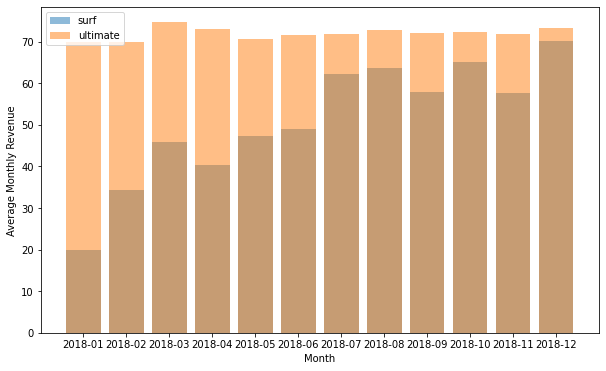

In [49]:

average_revenue = df.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
for plan in average_revenue['plan'].unique():
    plt.bar(average_revenue[average_revenue['plan'] == plan]['month'].astype(str), 
            average_revenue[average_revenue['plan'] == plan]['monthly_revenue'], 
            alpha=0.5, 
            label=plan)
plt.xlabel('Month')
plt.ylabel('Average Monthly Revenue')
plt.legend()
plt.show()

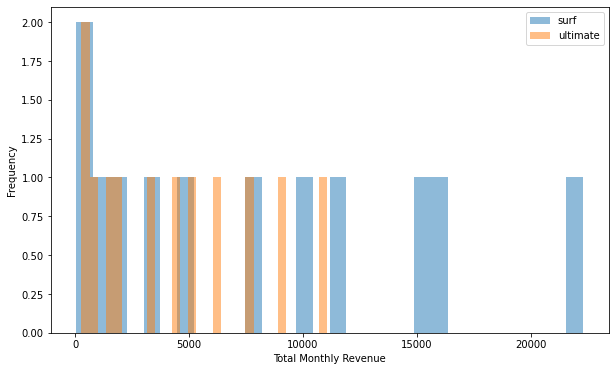

In [50]:
monthly_revenue = df.groupby(['plan', 'month'])['monthly_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
for plan in monthly_revenue['plan'].unique():
    plt.hist(monthly_revenue[monthly_revenue['plan'] == plan]['monthly_revenue'], 
             bins=30, 
             alpha=0.5, 
             label=plan)
plt.xlabel('Total Monthly Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [51]:
mean_revenue = df.groupby('plan')['monthly_revenue'].mean()
var_revenue = df.groupby('plan')['monthly_revenue'].var()

print(mean_revenue)
print(var_revenue)

plan
surf        60.327346
ultimate    72.313889
Name: monthly_revenue, dtype: float64
plan
surf        3053.955465
ultimate     129.848486
Name: monthly_revenue, dtype: float64


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

En este apartado sí podemos ver una diferencia sustancial en cuanto a los ingresos de cada plan ya que claramente
se puede apreciar que los ingresos del plan ultimate son mayores.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [53]:
# Prueba las hipótesis

ultimate_revenue = df[df['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = df[df['plan'] == 'surf']['monthly_revenue']

t_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Podemos rechazar la hipótesis nula debido a que los ingresos promedio de los planes Ultimate y Surf son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula debido a que los ingresos promedio de los planes Ultimate y Surf son iguales.")


t-statistic: 5.763617291201939
p-value: 9.342071816297584e-09
Podemos rechazar la hipótesis nula debido a que los ingresos promedio de los planes Ultimate y Surf son diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [54]:
# Prueba las hipótesis

df = pd.merge(df, users[['user_id', 'city']], on='user_id', how='left')

ny_nj_revenue = df[df['city'].str.contains('NY-NJ')]['monthly_revenue']
other_revenue = df[~df['city'].str.contains('NY-NJ')]['monthly_revenue']

t_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Podemos rechazar la hipótesis nula ya que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula debido a que el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.")

t-statistic: -2.047330849282919
p-value: 0.04073944362703164
Podemos rechazar la hipótesis nula ya que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Como conclusión y para resumir lo que se hizo en este proyecto empezamos por arreglar primero los errores
que consideré había en cada base de datos y traté de complementarlos con columnas que me parecieron relevantes
para comprender mejor los datos de cada uno, luego creé nuevos dataframe en donde iba almacenando
nuevas combinaciones que iba haciendo entre los datos para encontrar los resultados deseados
después analicé el comportamiento de los usuarios de cada plan y las diferencias entre los planes y por
útimo probé algunas hipótesis.